#### Name: Akshata Bheemasamudra Mallikarjunappa
#### Student ID: 23164204

SET-UP 1

In [247]:
!pip install deap

In [248]:
from deap import base
from deap import creator
from deap import tools

import random

import matplotlib.pyplot as plt

In [21]:
# Genetic Algorithm constants:
POPULATION_SIZE = 500
P_CROSSOVER = 0.8  # probability for crossover
P_MUTATION = 0.05 # probability for mutating an individual
MAX_GENERATIONS = 1100

In [22]:
NBR_ITEMS = 100   #For creating a dictionary of 100 itmes in it
MAX_WEIGHT = 1000  # Knapsack capacity defined as 1000

In [23]:
RANDOM_SEED = 42  #Setting the random seed
random.seed(RANDOM_SEED)

#Creating the items dictionary
items = {}
# Create random items and store them in the items' dictionary.
for i in range(NBR_ITEMS):
     items[i] = (random.randint(1, 10), random.randint(1, 100))
print(items)

{0: (2, 4), 1: (5, 32), 2: (4, 18), 3: (2, 87), 4: (9, 12), 5: (10, 55), 6: (1, 4), 7: (2, 28), 8: (4, 65), 9: (10, 4), 10: (9, 26), 11: (9, 54), 12: (4, 58), 13: (10, 36), 14: (1, 98), 15: (3, 90), 16: (7, 44), 17: (5, 20), 18: (4, 98), 19: (6, 14), 20: (2, 49), 21: (2, 46), 22: (6, 78), 23: (5, 6), 24: (8, 69), 25: (2, 49), 26: (2, 71), 27: (5, 81), 28: (10, 47), 29: (10, 25), 30: (2, 6), 31: (4, 99), 32: (5, 11), 33: (4, 13), 34: (7, 36), 35: (8, 82), 36: (6, 21), 37: (6, 46), 38: (4, 86), 39: (5, 90), 40: (2, 78), 41: (3, 69), 42: (4, 21), 43: (8, 49), 44: (5, 82), 45: (9, 29), 46: (6, 99), 47: (1, 30), 48: (1, 41), 49: (7, 35), 50: (2, 28), 51: (10, 92), 52: (6, 28), 53: (8, 51), 54: (8, 19), 55: (5, 18), 56: (4, 96), 57: (9, 69), 58: (5, 96), 59: (10, 55), 60: (10, 52), 61: (6, 29), 62: (3, 66), 63: (8, 12), 64: (1, 15), 65: (3, 81), 66: (3, 88), 67: (7, 77), 68: (2, 50), 69: (7, 77), 70: (8, 68), 71: (5, 71), 72: (1, 88), 73: (2, 88), 74: (9, 97), 75: (5, 99), 76: (6, 15), 77: (

In [24]:
toolbox = base.Toolbox()

# create an operator that randomly returns 0 or 1:
def probabilityzero():
  return random.choice([1,0,0])

toolbox.register("probabilityzero", probabilityzero)

# define a single objective, maximizing fitness strategy:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))

# create the Individual class based on list:
creator.create("Individual", list, fitness=creator.FitnessMax)
#creator.create("Individual", array.array, typecode='b', fitness=creator.FitnessMax)

# create the individual operator to fill up an Individual instance:
toolbox.register("individualCreator", tools.initRepeat, creator.Individual, toolbox.probabilityzero, NBR_ITEMS)

# create the population operator to generate a list of individuals:
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)


# fitness calculation:
# compute the number of '1's in the individual
# def oneMaxFitness(individual):
#     return sum(individual),  # return a tuple

def KnapSack(individual):
  total_value = 0
  total_weight = 0

  # for i in range(len(individual)):
  #     if individual[i] == 1:  # Include the item in the knapsack
  #         total_value += items[i][0] # Value of the item
  #         total_weight += items[i][1]  # Weight of the item


  for ind, value in zip(individual, items.values()):
    if ind == 1:
      total_value += value[0]
      total_weight += value[1]
# Apply a penalty for exceeding the weight limit
  if total_weight > MAX_WEIGHT:
      return 0,  # Return a fitness of 0 if the weight constraint is violated

  return total_value,  # Return the total value as the fitness,



toolbox.register("evaluate", KnapSack)

# genetic operators:

# Tournament selection with tournament size of 3:
toolbox.register("select", tools.selTournament, tournsize=5)

# Single-point crossover:
toolbox.register("mate", tools.cxOnePoint)

# Flip-bit mutation:
# indpb: Independent probability for each attribute to be flipped
toolbox.register("mutate", tools.mutFlipBit, indpb=1.0/NBR_ITEMS)



In [25]:
# create initial population (generation 0):
population = toolbox.populationCreator(n=POPULATION_SIZE)
generationCounter = 0

# calculate fitness tuple for each individual in the population:
fitnessValues = list(map(toolbox.evaluate, population))
for individual, fitnessValue in zip(population, fitnessValues):
    individual.fitness.values = fitnessValue

# extract fitness values from all individuals in population:
fitnessValues = [individual.fitness.values[0] for individual in population]

# initialize statistics accumulators:
maxFitnessValues = []
meanFitnessValues = []

# main evolutionary loop:
# stop if max fitness value reached the known max value
# OR if number of generations exceeded the preset value:
while max(fitnessValues) < MAX_WEIGHT and generationCounter < MAX_GENERATIONS:
    # update counter:
    generationCounter = generationCounter + 1

    # apply the selection operator, to select the next generation's individuals:
    offspring = toolbox.select(population, len(population))
    # clone the selected individuals:
    offspring = list(map(toolbox.clone, offspring))

    # apply the crossover operator to pairs of offspring:
    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        if random.random() < P_CROSSOVER:
            toolbox.mate(child1, child2)
            del child1.fitness.values
            del child2.fitness.values

    for mutant in offspring:
        if random.random() < P_MUTATION:
            toolbox.mutate(mutant)
            del mutant.fitness.values

# calculate fitness for the individuals with no previous calculated fitness value:
    freshIndividuals = [ind for ind in offspring if not ind.fitness.valid]
    freshFitnessValues = list(map(toolbox.evaluate, freshIndividuals))
    for individual, fitnessValue in zip(freshIndividuals, freshFitnessValues):
        individual.fitness.values = fitnessValue

    # replace the current population with the offspring:
    population[:] = offspring

    # collect fitnessValues into a list, update statistics and print:
    fitnessValues = [ind.fitness.values[0] for ind in population]

    maxFitness = max(fitnessValues)
    meanFitness = sum(fitnessValues) / len(population)
    maxFitnessValues.append(maxFitness)
    meanFitnessValues.append(meanFitness)
    print("- Generation {}: Max Fitness = {}, Avg Fitness = {}".format(generationCounter, maxFitness, meanFitness))

    # find and print best individual:
    best_index = fitnessValues.index(max(fitnessValues))
    print("Best Individual = ", *population[best_index], "\n")

- Generation 1: Max Fitness = 125.0, Avg Fitness = 2.26
Best Individual =  1 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 

- Generation 2: Max Fitness = 126.0, Avg Fitness = 5.104
Best Individual =  1 0 0 1 1 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 

- Generation 3: Max Fitness = 149.0, Avg Fitness = 13.104
Best Individual =  1 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 

- Generation 4: Max Fitness = 164.0, Avg Fitness = 45.016
Best Individual =  1 1 1 0 1 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0

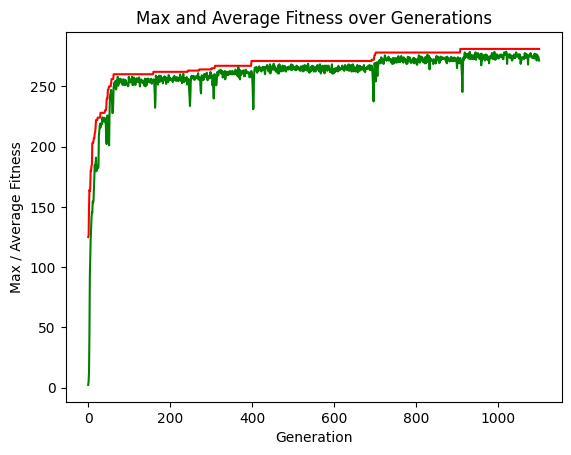

In [26]:
# Genetic Algorithm is done - plot statistics:
#sns.set_style("whitegrid")
plt.plot(maxFitnessValues, color='red')
plt.plot(meanFitnessValues, color='green')
plt.xlabel('Generation')
plt.ylabel('Max / Average Fitness')
plt.title('Max and Average Fitness over Generations')
plt.show()

SET-UP 2

The set-up 1 required a good number of generations and higher mutation and crossover values to achieve a fitness function of 280 and above. However set-up 2 is aimed at achievning the same result with a fewer number of generations as given below and by penalising the extra weight.

In [27]:
!pip install deap
from deap import base
from deap import creator
from deap import tools

import random

import matplotlib.pyplot as plt

In [43]:
# Genetic Algorithm constants:
POPULATION_SIZE = 500
P_CROSSOVER = 0.9  # probability for crossover
P_MUTATION = 0.05 # probability for mutating an individual
MAX_GENERATIONS = 50

In [44]:
NBR_ITEMS = 100   #For creating a dictionary of 100 itmes in it
MAX_WEIGHT = 1000  # Knapsack capacity defined as 1000

In [45]:
RANDOM_SEED = 42  #Setting the random seed
random.seed(RANDOM_SEED)

#Creating the items dictionary
items = {}
# Create random items and store them in the items' dictionary.
for i in range(NBR_ITEMS):
     items[i] = (random.randint(1, 10), random.randint(1, 100))
print(items)

{0: (2, 4), 1: (5, 32), 2: (4, 18), 3: (2, 87), 4: (9, 12), 5: (10, 55), 6: (1, 4), 7: (2, 28), 8: (4, 65), 9: (10, 4), 10: (9, 26), 11: (9, 54), 12: (4, 58), 13: (10, 36), 14: (1, 98), 15: (3, 90), 16: (7, 44), 17: (5, 20), 18: (4, 98), 19: (6, 14), 20: (2, 49), 21: (2, 46), 22: (6, 78), 23: (5, 6), 24: (8, 69), 25: (2, 49), 26: (2, 71), 27: (5, 81), 28: (10, 47), 29: (10, 25), 30: (2, 6), 31: (4, 99), 32: (5, 11), 33: (4, 13), 34: (7, 36), 35: (8, 82), 36: (6, 21), 37: (6, 46), 38: (4, 86), 39: (5, 90), 40: (2, 78), 41: (3, 69), 42: (4, 21), 43: (8, 49), 44: (5, 82), 45: (9, 29), 46: (6, 99), 47: (1, 30), 48: (1, 41), 49: (7, 35), 50: (2, 28), 51: (10, 92), 52: (6, 28), 53: (8, 51), 54: (8, 19), 55: (5, 18), 56: (4, 96), 57: (9, 69), 58: (5, 96), 59: (10, 55), 60: (10, 52), 61: (6, 29), 62: (3, 66), 63: (8, 12), 64: (1, 15), 65: (3, 81), 66: (3, 88), 67: (7, 77), 68: (2, 50), 69: (7, 77), 70: (8, 68), 71: (5, 71), 72: (1, 88), 73: (2, 88), 74: (9, 97), 75: (5, 99), 76: (6, 15), 77: (

In [49]:
toolbox = base.Toolbox()

# create an operator that randomly returns 0 or 1:
def probabilityzero():
  return random.choice([1,0,0])

toolbox.register("probabilityzero", probabilityzero)

# define a single objective, maximizing fitness strategy:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))

# create the Individual class based on list:
creator.create("Individual", list, fitness=creator.FitnessMax)
#creator.create("Individual", array.array, typecode='b', fitness=creator.FitnessMax)

# create the individual operator to fill up an Individual instance:
toolbox.register("individualCreator", tools.initRepeat, creator.Individual, toolbox.probabilityzero, NBR_ITEMS)

# create the population operator to generate a list of individuals:
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)


# fitness calculation:
# compute the number of '1's in the individual
# def oneMaxFitness(individual):
#     return sum(individual),  # return a tuple

def KnapSack(individual):
  total_value = 0
  total_weight = 0

  # for i in range(len(individual)):
  #     if individual[i] == 1:  # Include the item in the knapsack
  #         total_value += items[i][0] # Value of the item
  #         total_weight += items[i][1]  # Weight of the item


  for ind, value in zip(individual, items.values()):
    if ind == 1:
      total_value += value[0]
      total_weight += value[1]
# Apply a penalty for exceeding the weight limit
  new_penalise = 0.15

  if total_weight > MAX_WEIGHT:
    extra_weight = total_weight-MAX_WEIGHT
    return total_value-(new_penalise*extra_weight),  # Return a fitness of 0 if the weight constraint is violated

  return total_value,  # Return the total value as the fitness,


toolbox.register("evaluate", KnapSack)

# genetic operators:

# Tournament selection with tournament size of 3:
toolbox.register("select", tools.selTournament, tournsize=5)

# Single-point crossover:
toolbox.register("mate", tools.cxOnePoint)

# Flip-bit mutation:
# indpb: Independent probability for each attribute to be flipped
toolbox.register("mutate", tools.mutFlipBit, indpb=1.0/NBR_ITEMS)


In [50]:
# create initial population (generation 0):
population = toolbox.populationCreator(n=POPULATION_SIZE)
generationCounter = 0

# calculate fitness tuple for each individual in the population:
fitnessValues = list(map(toolbox.evaluate, population))
for individual, fitnessValue in zip(population, fitnessValues):
    individual.fitness.values = fitnessValue

# extract fitness values from all individuals in population:
fitnessValues = [individual.fitness.values[0] for individual in population]

# initialize statistics accumulators:
maxFitnessValues = []
meanFitnessValues = []

# main evolutionary loop:
# stop if max fitness value reached the known max value
# OR if number of generations exceeded the preset value:
while max(fitnessValues) < MAX_WEIGHT and generationCounter < MAX_GENERATIONS:
    # update counter:
    generationCounter = generationCounter + 1

    # apply the selection operator, to select the next generation's individuals:
    offspring = toolbox.select(population, len(population))
    # clone the selected individuals:
    offspring = list(map(toolbox.clone, offspring))

    # apply the crossover operator to pairs of offspring:
    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        if random.random() < P_CROSSOVER:
            toolbox.mate(child1, child2)
            del child1.fitness.values
            del child2.fitness.values

    for mutant in offspring:
        if random.random() < P_MUTATION:
            toolbox.mutate(mutant)
            del mutant.fitness.values

# calculate fitness for the individuals with no previous calculated fitness value:
    freshIndividuals = [ind for ind in offspring if not ind.fitness.valid]
    freshFitnessValues = list(map(toolbox.evaluate, freshIndividuals))
    for individual, fitnessValue in zip(freshIndividuals, freshFitnessValues):
        individual.fitness.values = fitnessValue

    # replace the current population with the offspring:
    population[:] = offspring

    # collect fitnessValues into a list, update statistics and print:
    fitnessValues = [ind.fitness.values[0] for ind in population]

    maxFitness = max(fitnessValues)
    meanFitness = sum(fitnessValues) / len(population)
    maxFitnessValues.append(maxFitness)
    meanFitnessValues.append(meanFitness)
    print("- Generation {}: Max Fitness = {}, Avg Fitness = {}".format(generationCounter, maxFitness, meanFitness))

    # find and print best individual:
    best_index = fitnessValues.index(max(fitnessValues))
    print("Best Individual = ", *population[best_index], "\n")

- Generation 1: Max Fitness = 159.75, Avg Fitness = 96.42990000000003
Best Individual =  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 

- Generation 2: Max Fitness = 173.0, Avg Fitness = 120.54330000000007
Best Individual =  0 1 0 1 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1 0 

- Generation 3: Max Fitness = 180.45, Avg Fitness = 140.99829999999997
Best Individual =  0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 

- Generation 4: Max Fitness = 197.25, Avg Fitness = 158.85560000000004
Best Individual =  0 0 0 0 1 0 1 0 0 1 1 0 1 1 0 0 1 0 

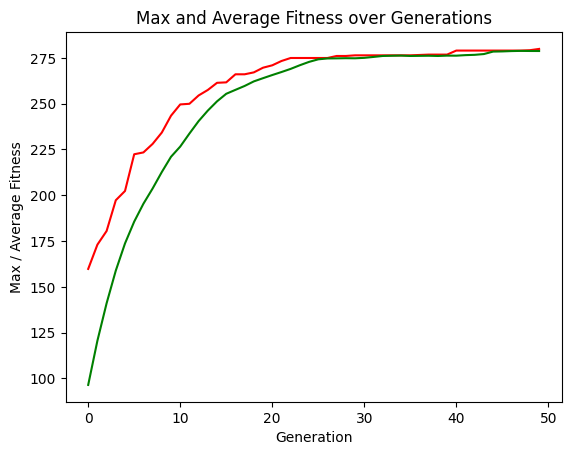

In [51]:
# Genetic Algorithm is done - plot statistics:
#sns.set_style("whitegrid")
plt.plot(maxFitnessValues, color='red')
plt.plot(meanFitnessValues, color='green')
plt.xlabel('Generation')
plt.ylabel('Max / Average Fitness')
plt.title('Max and Average Fitness over Generations')
plt.show()